In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data=pd.read_csv("adult.csv",na_values="?",keep_default_na=False)

In [32]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
data.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [35]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [36]:
object_data=[x for x in data.columns if data[x].dtypes=="O"]
object_data

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [37]:
continuous_data=[x for x in data.columns if data[x].dtypes=="int64"]
continuous_data

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [38]:
data[object_data]

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [39]:
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [40]:
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [41]:
def plot(data,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    data.value_counts().plot.pie()
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

In [42]:
data["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

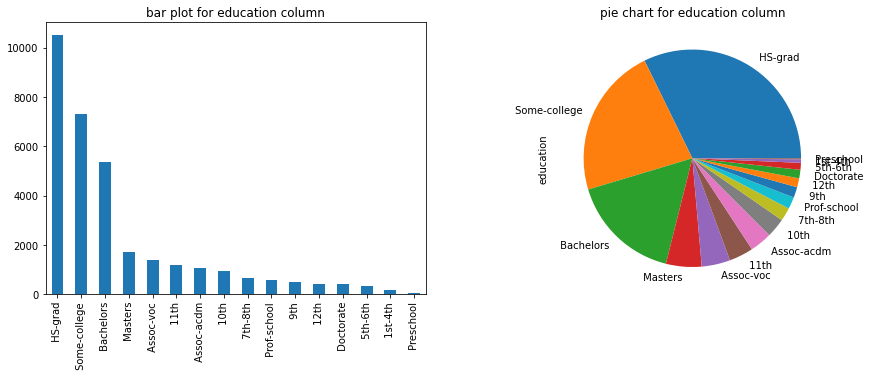

In [43]:
plot(data["education"],"education")

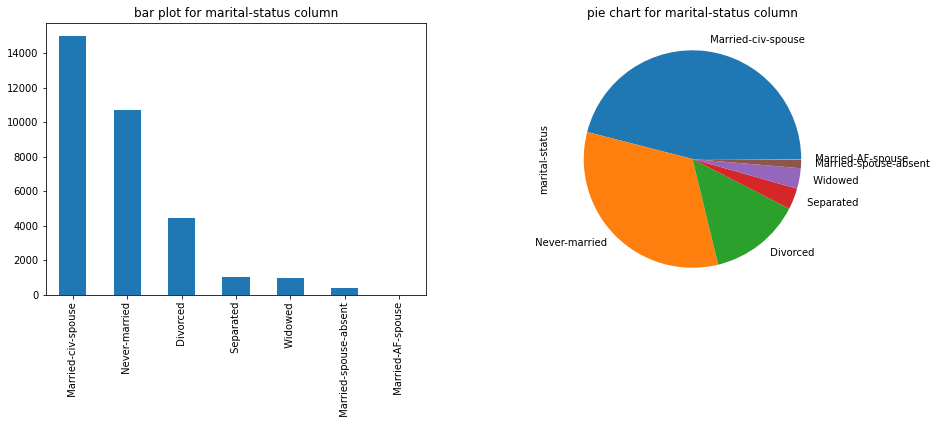

In [44]:
plot(data["marital-status"],"marital-status")

In [45]:
data["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [46]:
data=data[data["occupation"]!="?"]

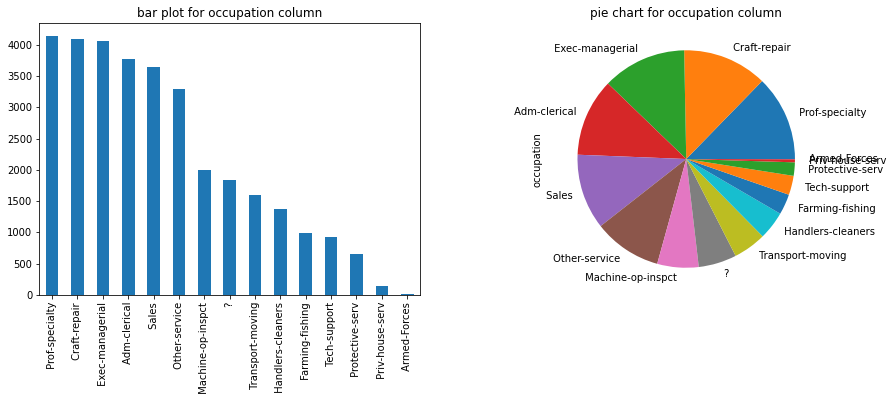

In [47]:
plot(data["occupation"],"occupation")

In [48]:
data["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

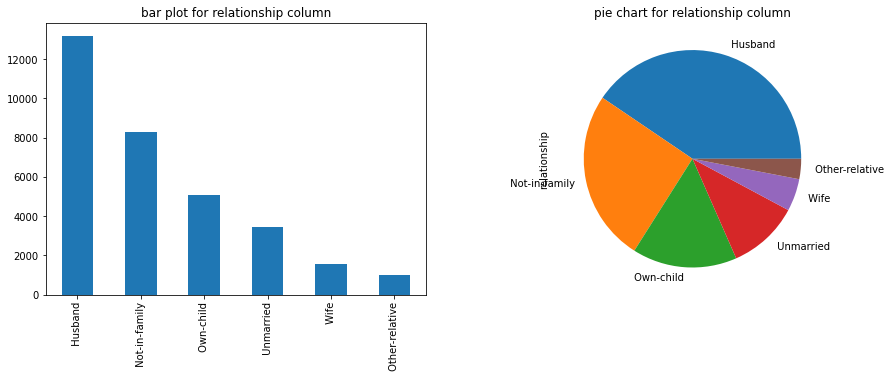

In [49]:
plot(data["relationship"],"relationship")

In [50]:
data["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

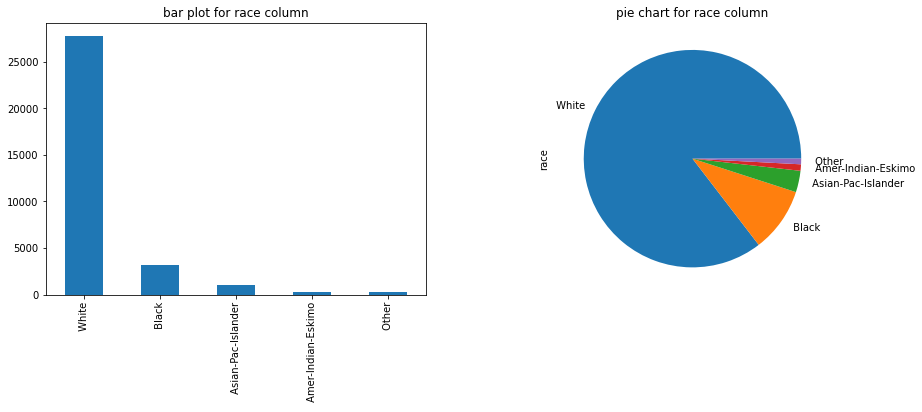

In [51]:
plot(data["race"],"race")

In [52]:
data["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

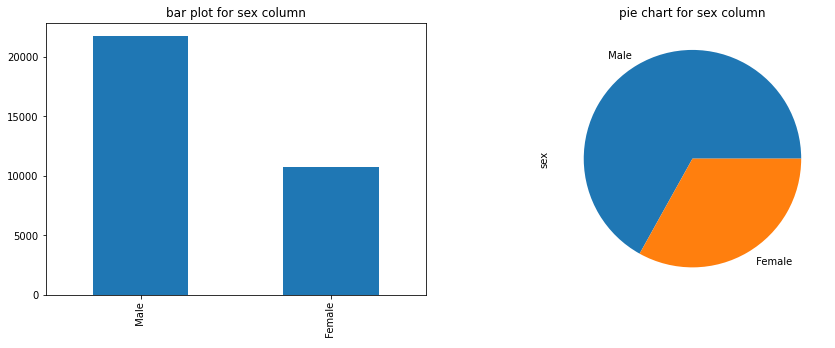

In [53]:
plot(data["sex"],"sex")

In [54]:
data["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

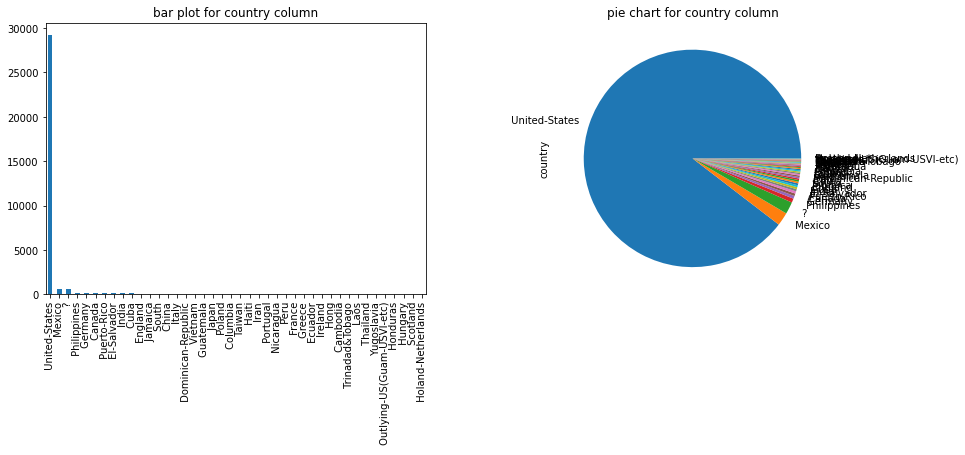

In [55]:
plot(data["country"],"country")

In [56]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
data["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

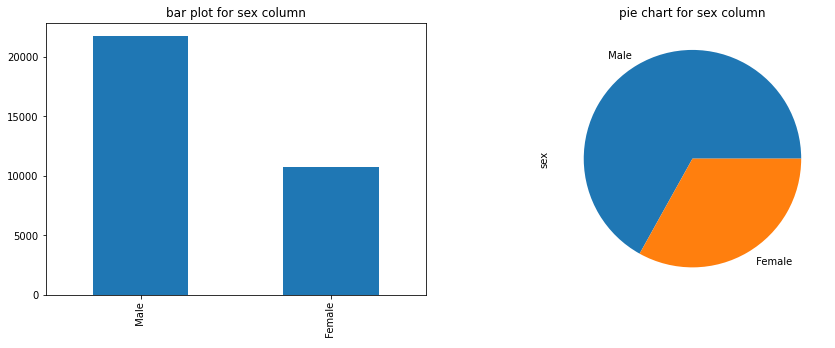

In [58]:
plot(data["sex"],"sex")

In [59]:
data["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

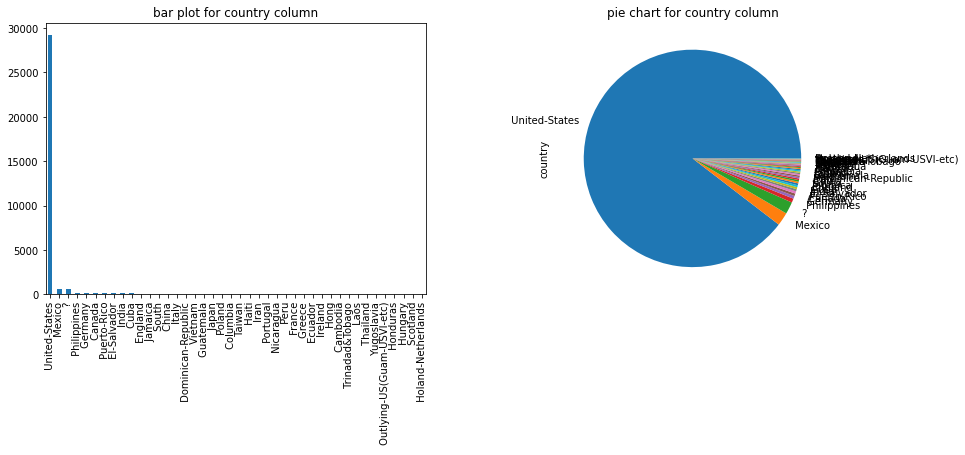

In [60]:
plot(data["country"],"country")

In [61]:
data["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

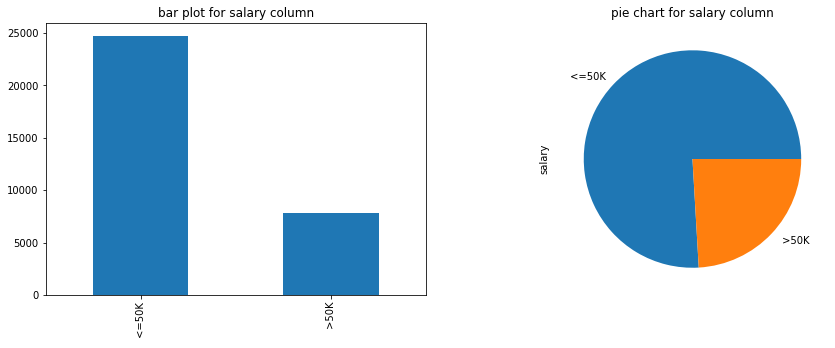

In [62]:
plot(data["salary"],"salary")

In [63]:
data[continuous_data]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


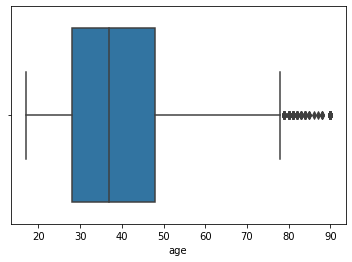

In [64]:
sns.boxplot(data["age"])
plt.show()

In [65]:
data["fnlwgt"]

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


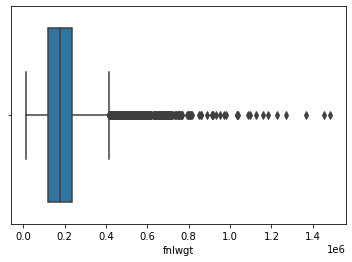

In [66]:
sns.boxplot(data["fnlwgt"])
plt.show()

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num'>

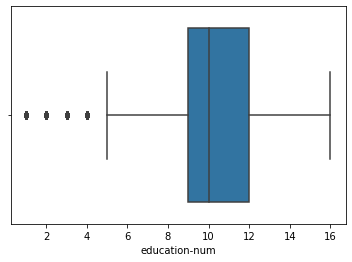

In [67]:
sns.boxplot(data["education-num"])

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

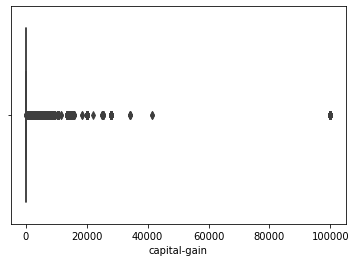

In [68]:
sns.boxplot(data["capital-gain"])

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

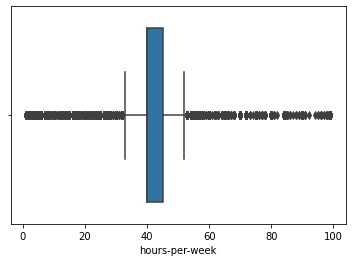

In [69]:
sns.boxplot(data["hours-per-week"])

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

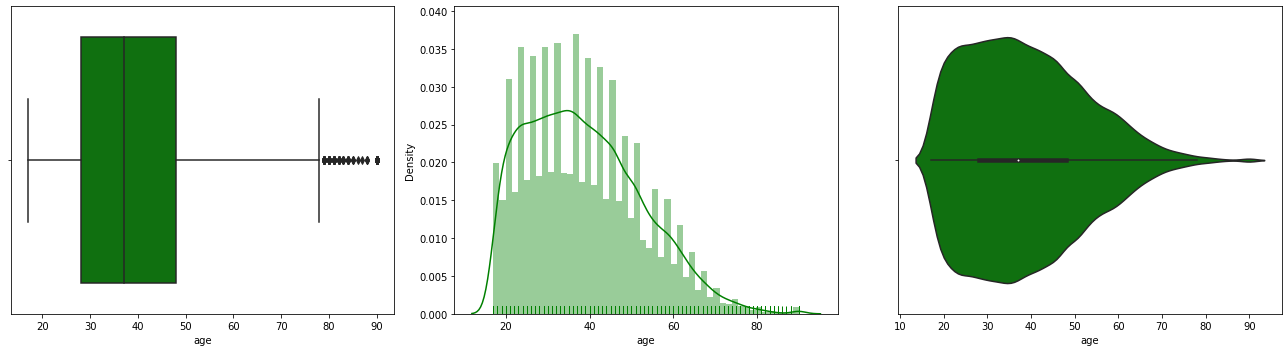

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

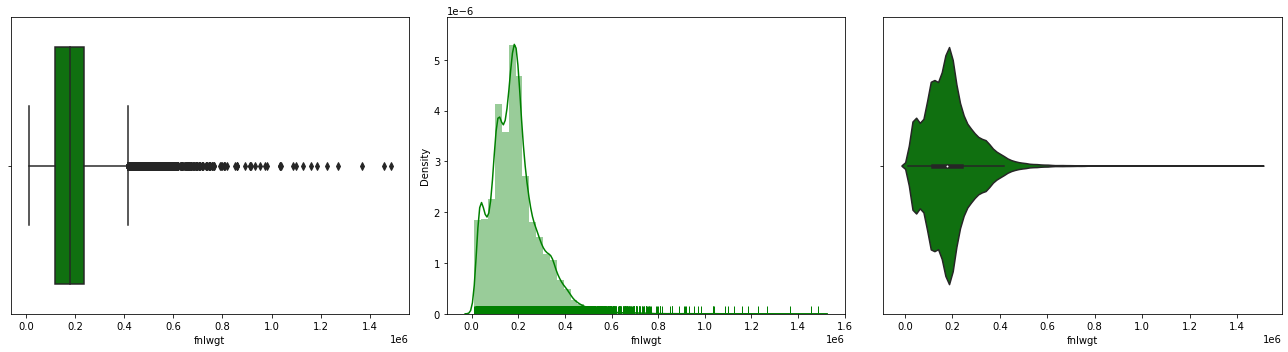

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

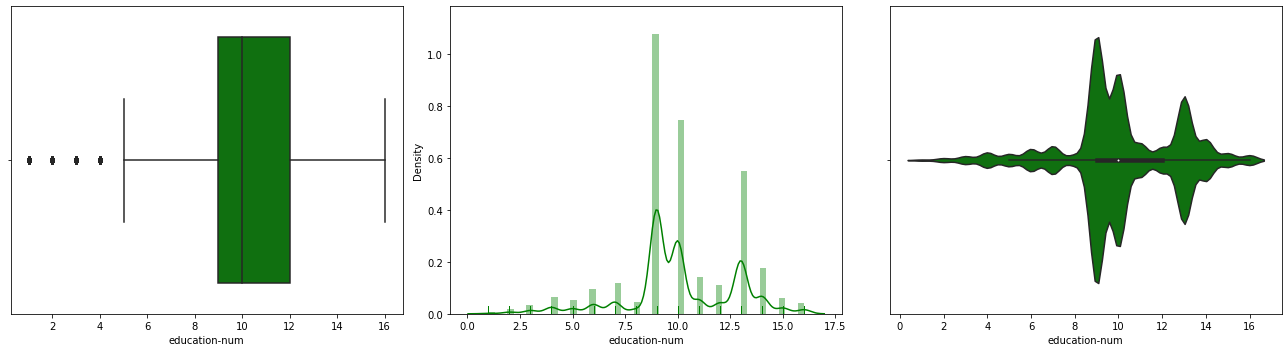

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

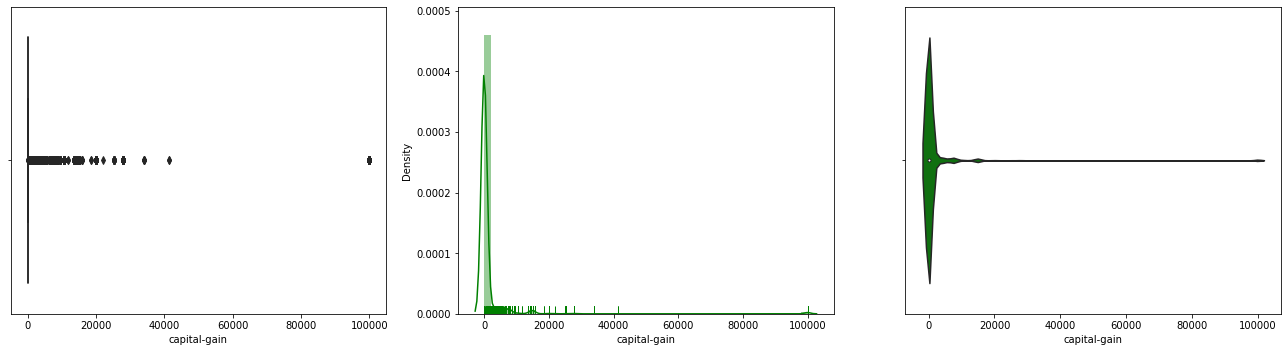

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

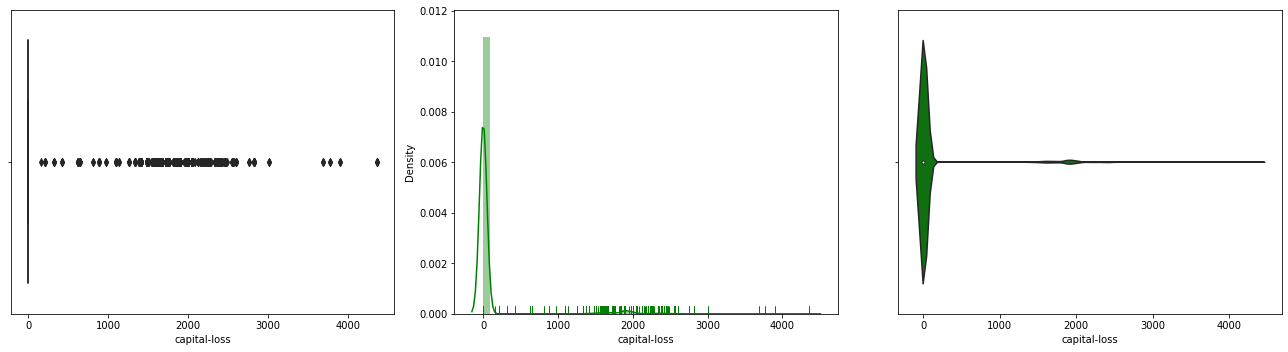

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

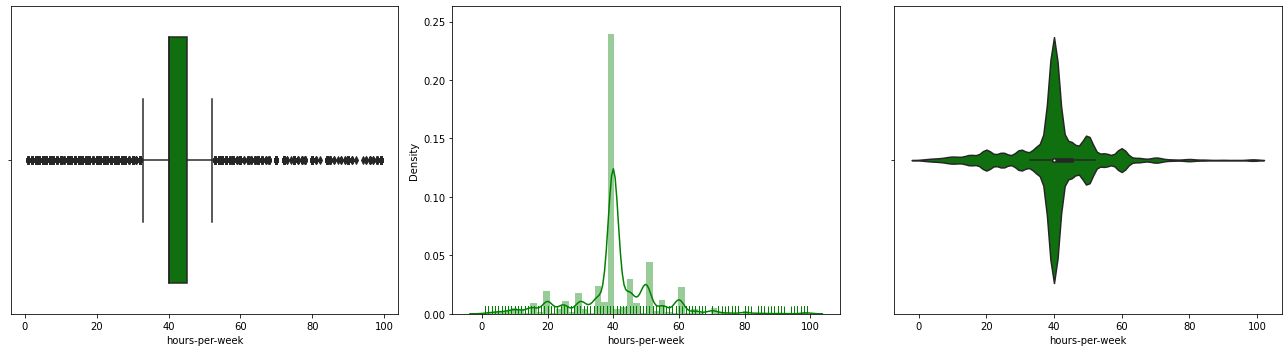

In [70]:
num=data[continuous_data]
for i in enumerate(continuous_data):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num[i[1]], rug = True,  color= 'Green',kde=True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num[i[1]], orient= 'vertical',  color= 'Green')
    plt.tight_layout()
    plt.show()

In [71]:
#outlier detection
def outlier_detection(data,colname):
    data=data[data[colname]<=(data[colname].mean()+3*data[colname].std())]
    return data

In [72]:
data[continuous_data].columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [73]:
data0=outlier_detection(data,"age")
print(data0.shape)
data2=outlier_detection(data0,"fnlwgt")
print(data2.shape)
data3=outlier_detection(data2,"education-num")
print(data3.shape)
data4=outlier_detection(data3,"capital-gain")
print(data4.shape)
data5=outlier_detection(data4,"hours-per-week")
print(data5.shape)

(32440, 15)
(32095, 15)
(32095, 15)
(31882, 15)
(31544, 15)


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

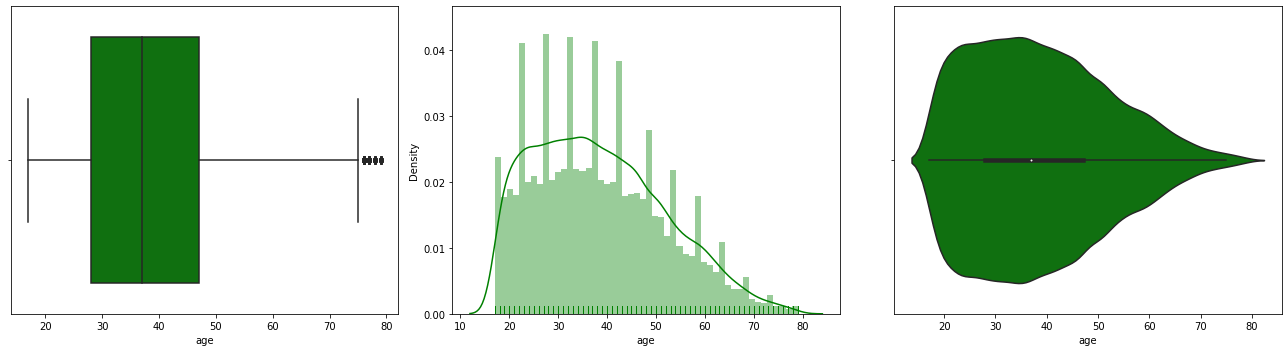

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

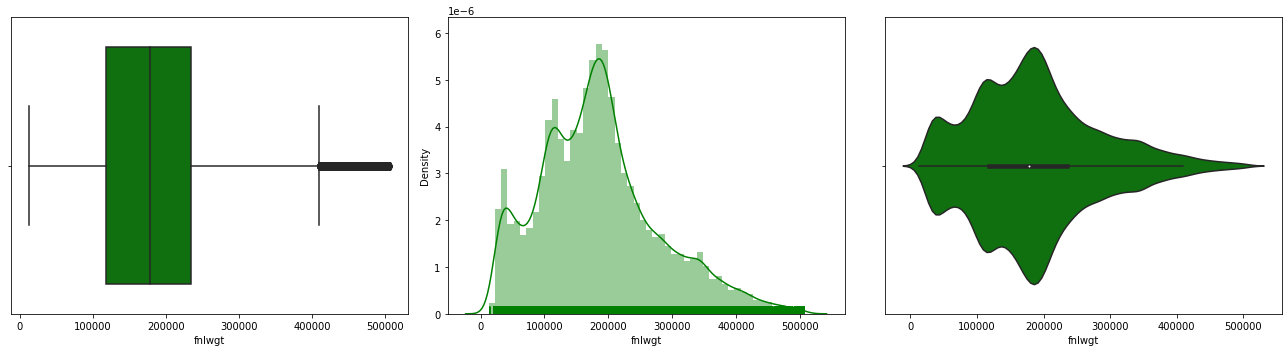

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

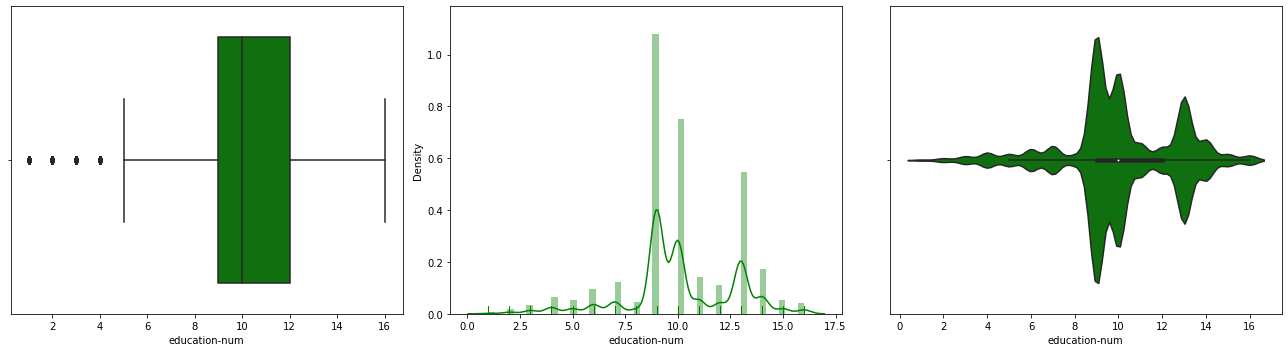

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

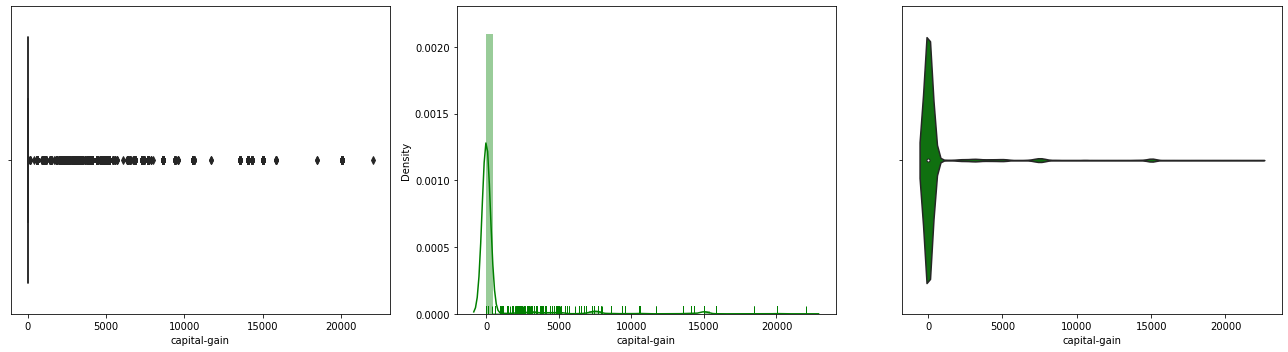

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

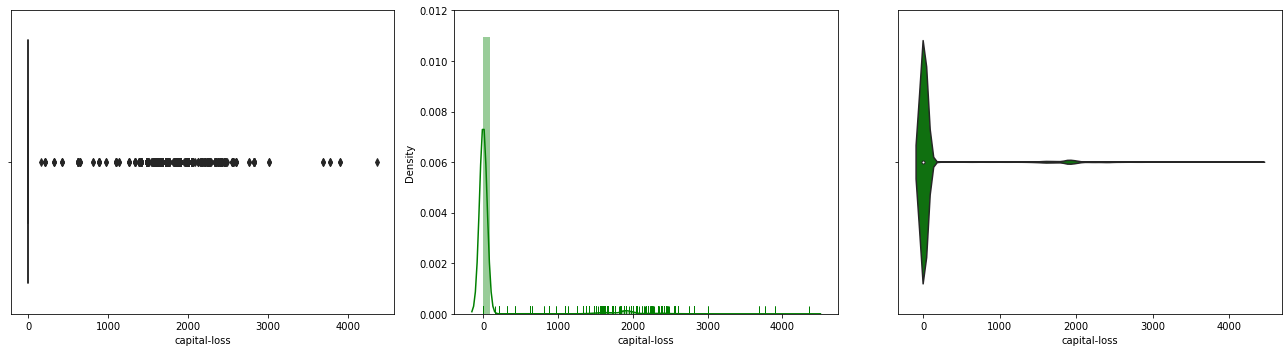

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sea

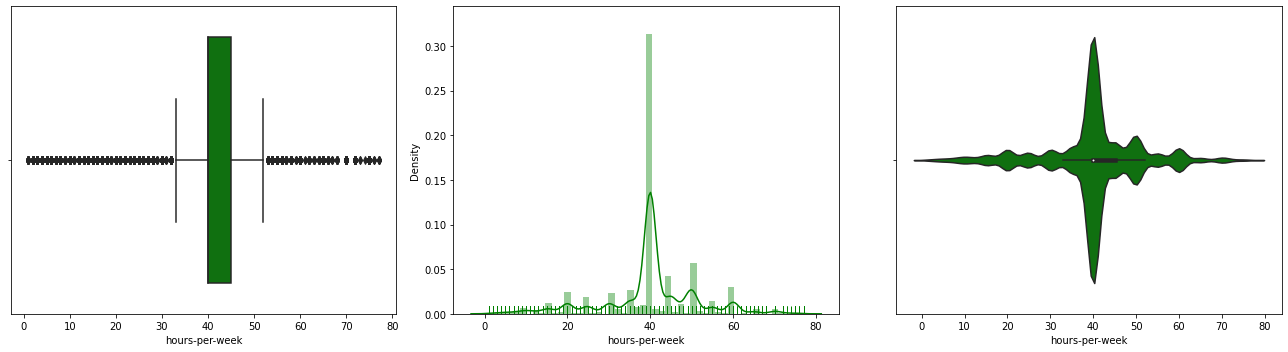

In [74]:
num=data5[continuous_data]
for i in enumerate(continuous_data):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num[i[1]], rug = True,  color= 'Green',kde=True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num[i[1]], orient= 'vertical',  color= 'Green')
    plt.tight_layout()
    plt.show()

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


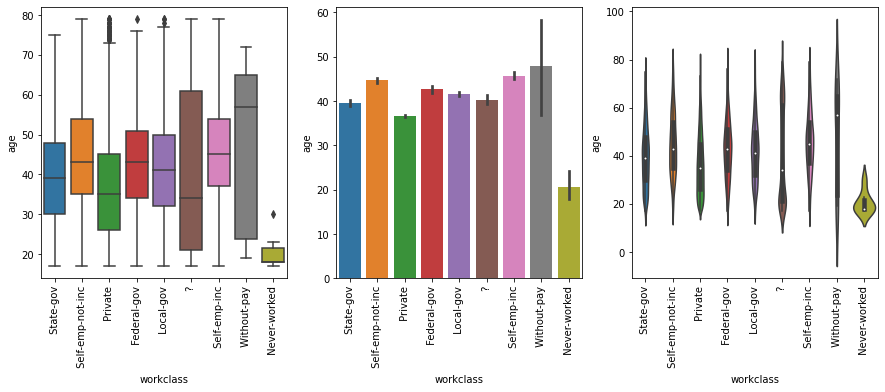

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


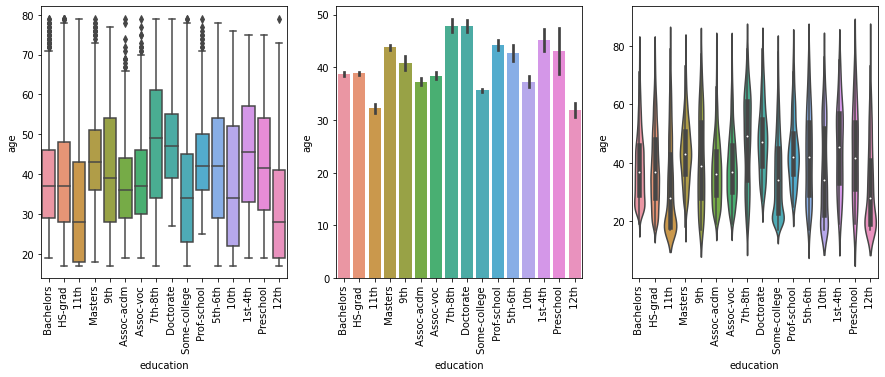

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


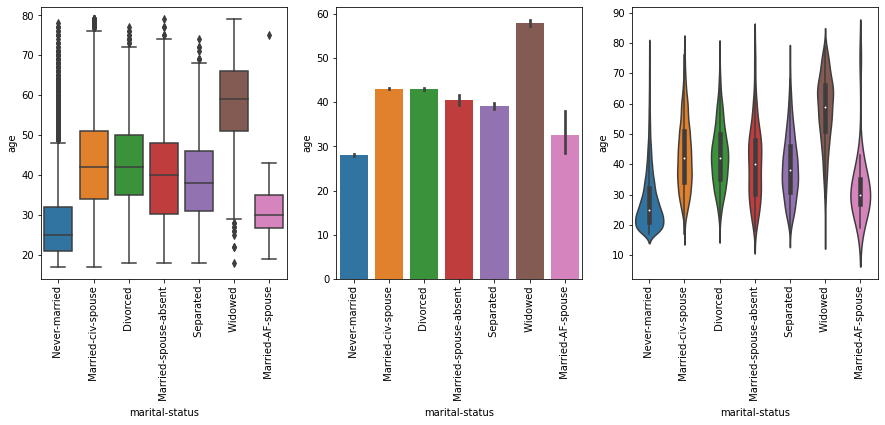

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


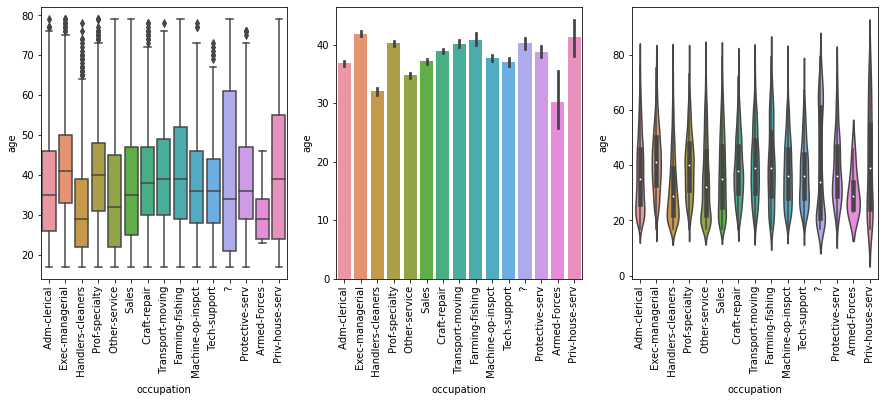

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


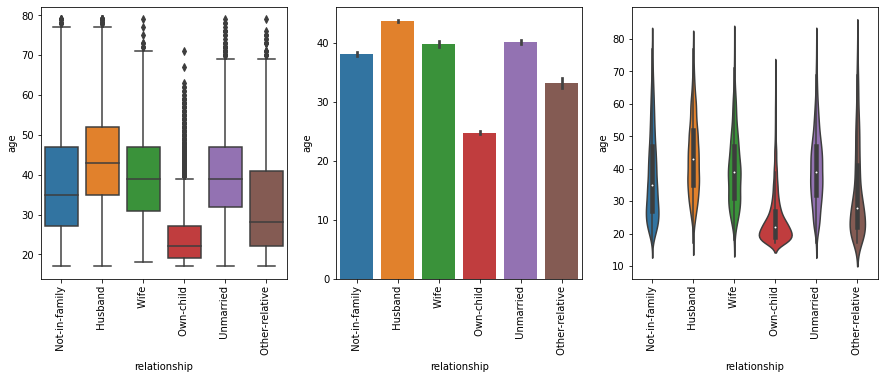

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


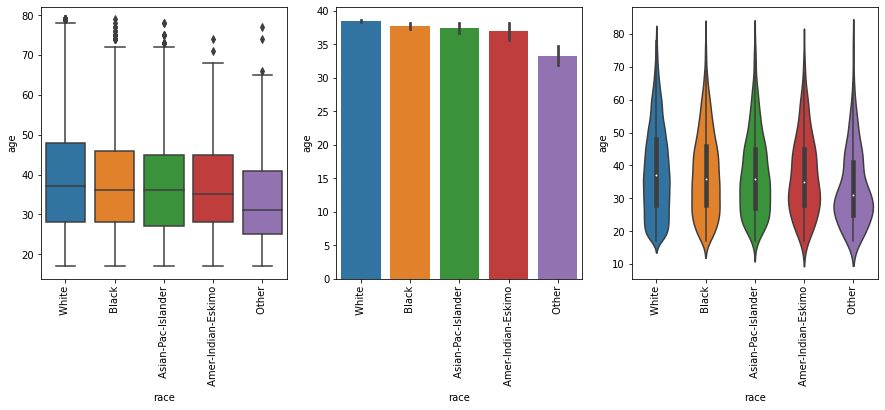

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


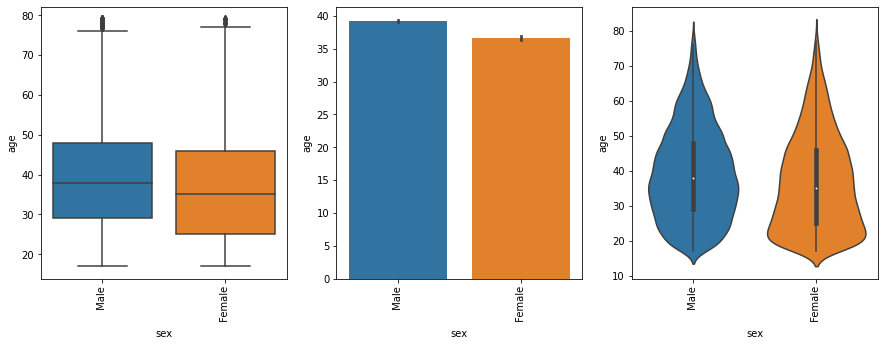

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


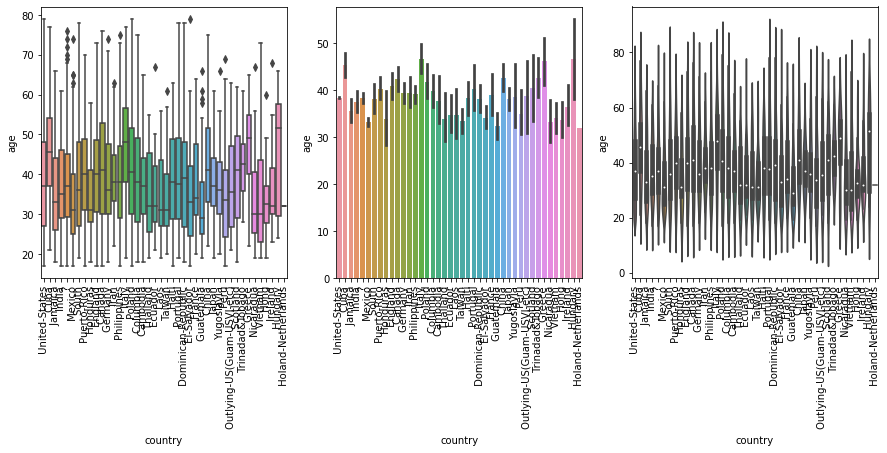

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


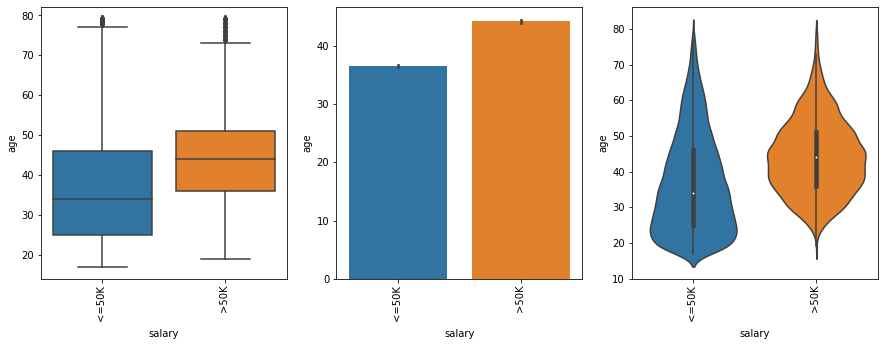

In [75]:
catcol=data5[object_data]
for i in enumerate(object_data):
    fig=plt.figure(figsize=(15,5))
    ax = fig.add_subplot(131)
    sns.boxplot(catcol[i[1]],data5["age"])
    plt.xticks(rotation=90)
    
    ax1 = fig.add_subplot(132)
    sns.barplot(x = catcol[i[1]], y= data5['age'])
    plt.xticks(rotation=90)
    
    fig2 = fig.add_subplot(133)
    sns.violinplot(x = catcol[i[1]], y= data5['age'])
    plt.xticks(rotation=90)
    plt.show()

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: Fu

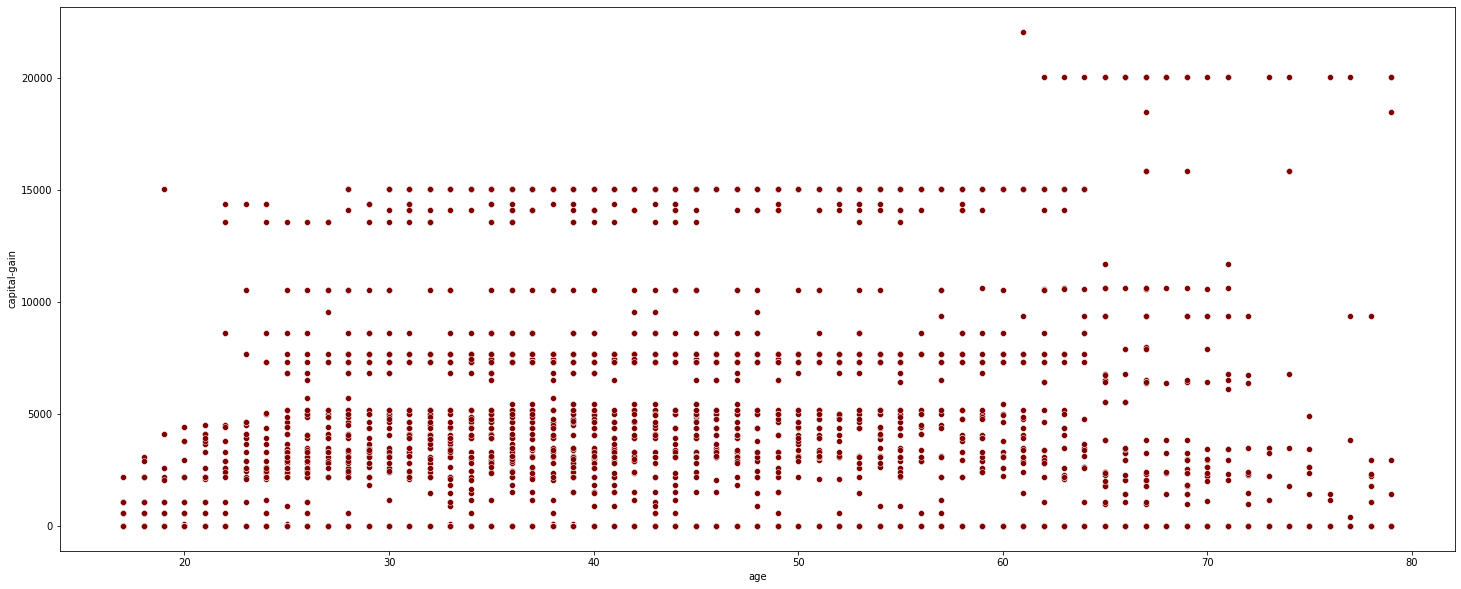

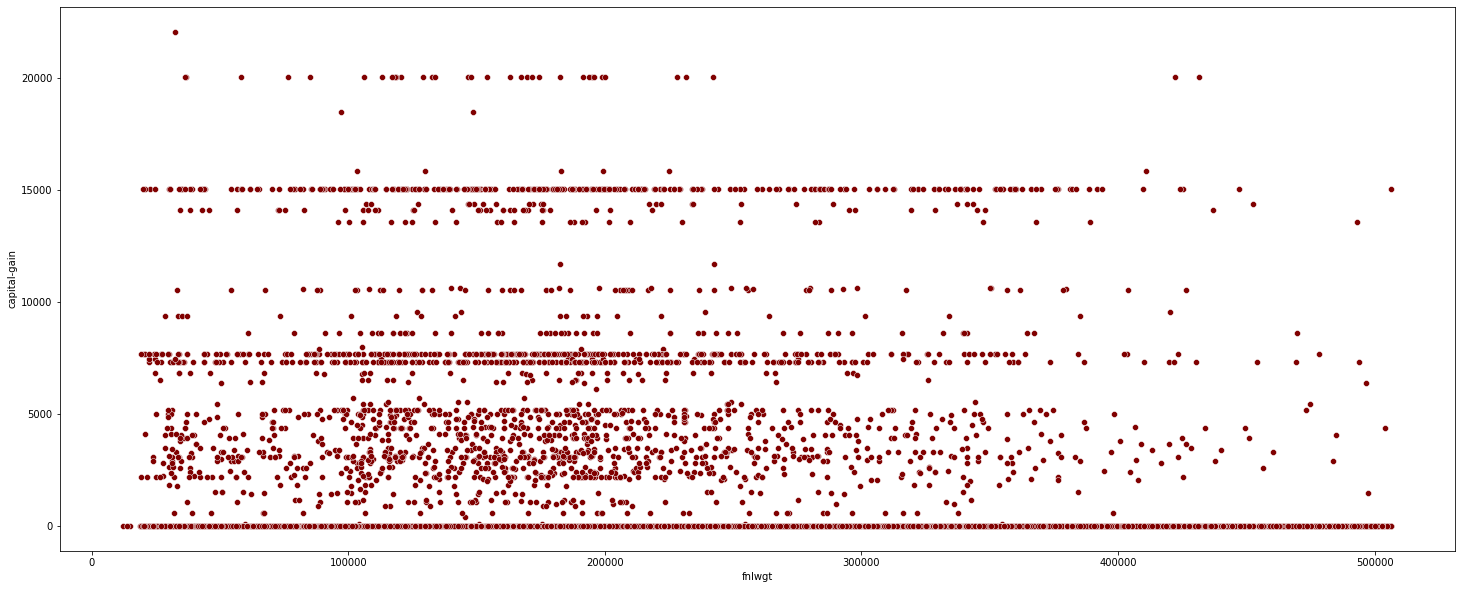

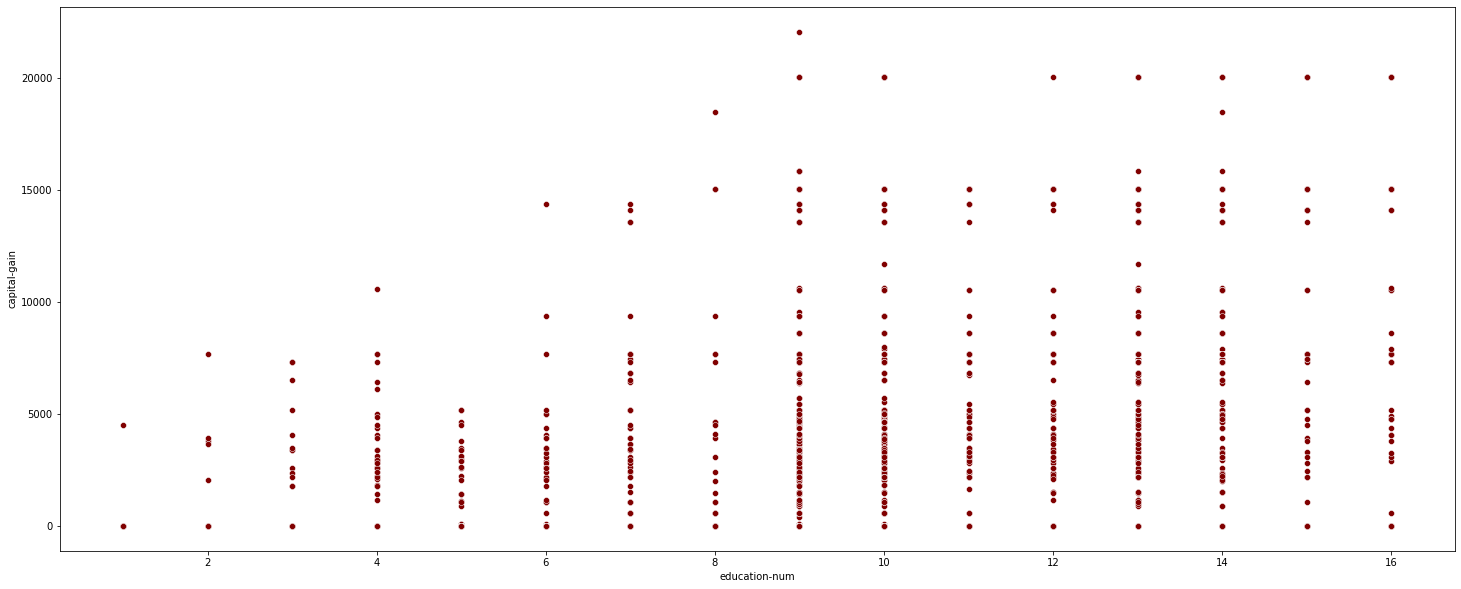

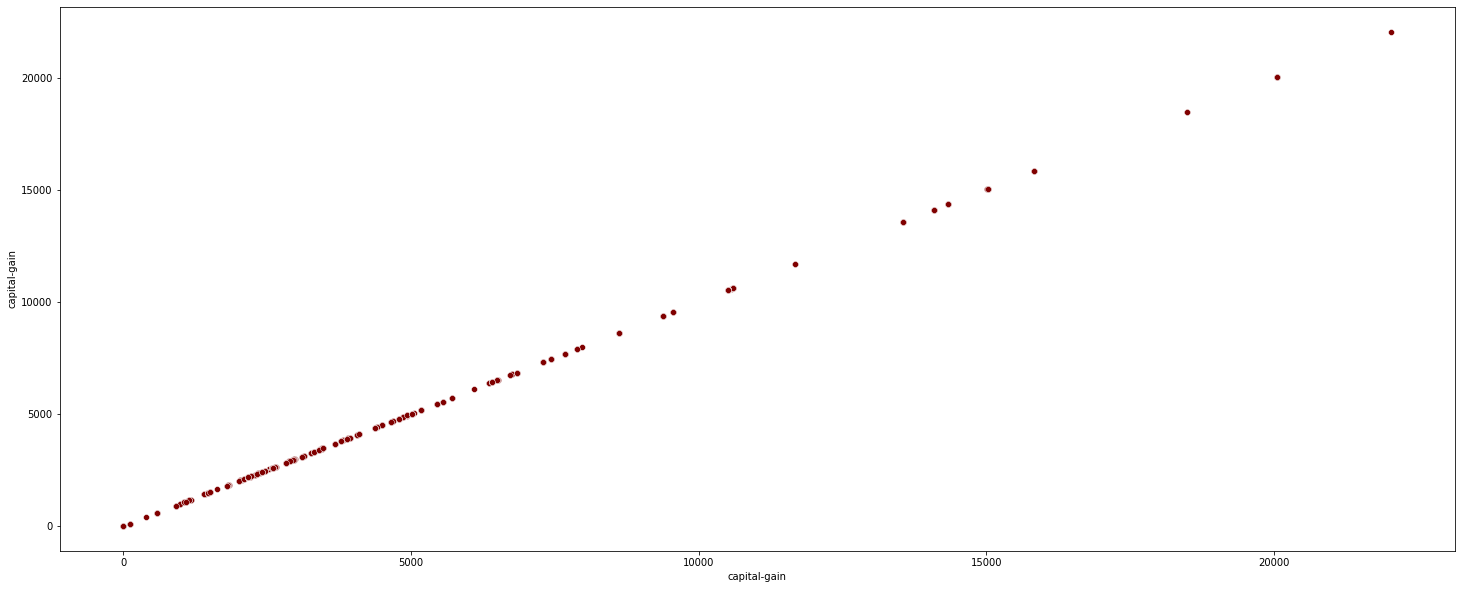

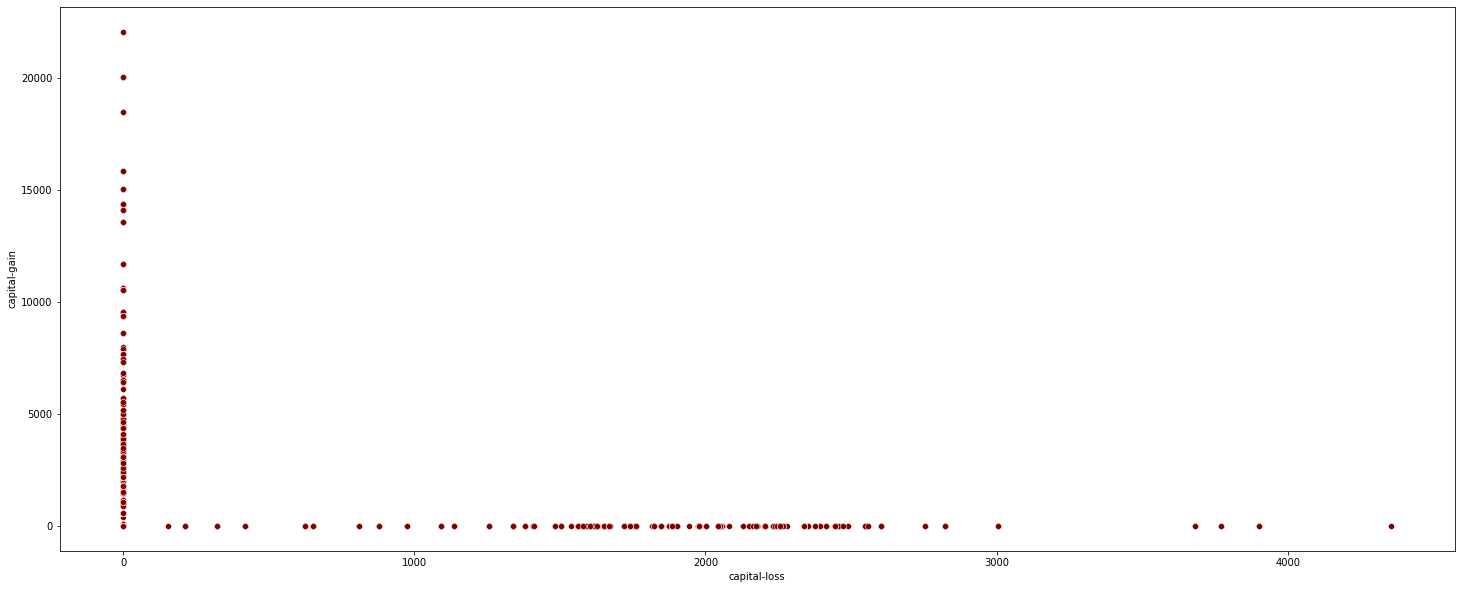

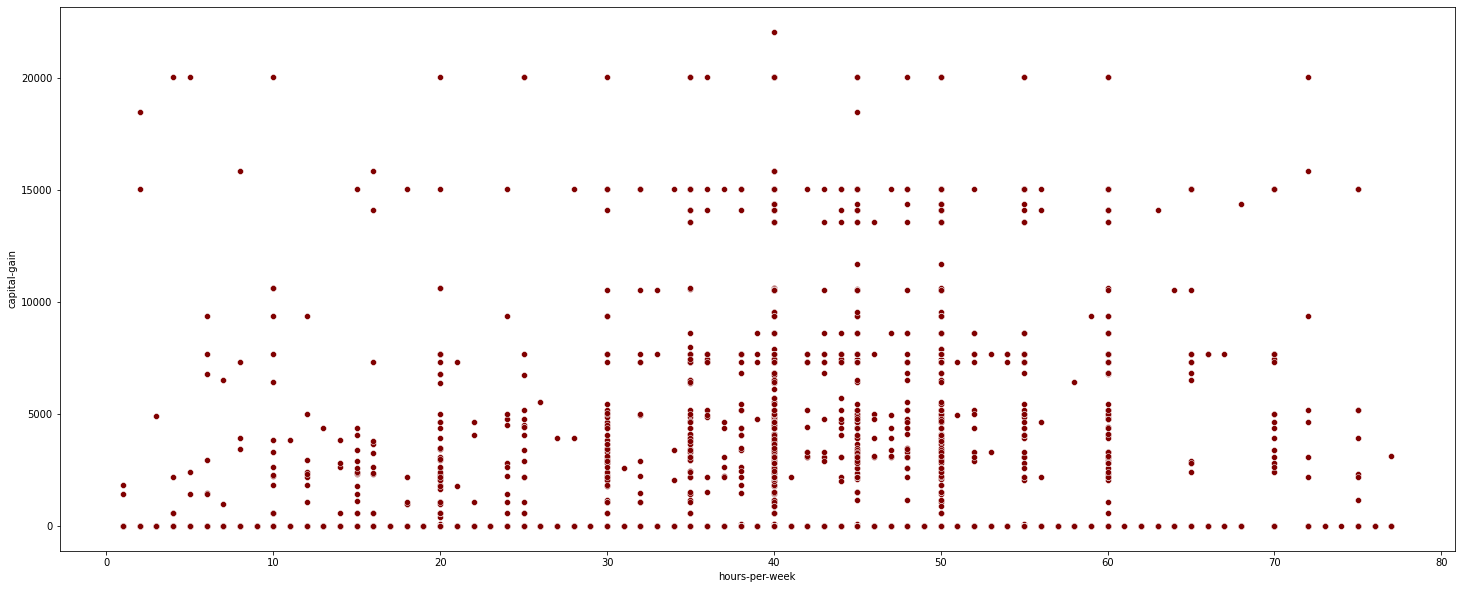

In [76]:
numcol=data5[continuous_data]
for i in enumerate(continuous_data):
    fig=plt.figure(figsize=(25,10))
    sns.scatterplot(numcol[i[1]],data5["capital-gain"],color="maroon") 

In [77]:
cont_data5=[x for x in data5.columns if data5[x].dtypes=="int64"]
cont_data5
data5[cont_data5]
cont_data5=pd.DataFrame(data5[cont_data5])
cont_data5.shape

(31544, 6)

In [78]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
cont_data5=minmax.fit_transform(cont_data5)
cont_data5=pd.DataFrame(cont_data5,columns=data5[continuous_data].columns)
cont_data5

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.354839,0.132006,0.800000,0.098639,0.0,0.513158
1,0.532258,0.143733,0.800000,0.000000,0.0,0.157895
2,0.338710,0.411536,0.533333,0.000000,0.0,0.513158
3,0.580645,0.450138,0.400000,0.000000,0.0,0.513158
4,0.177419,0.659968,0.800000,0.000000,0.0,0.513158
...,...,...,...,...,...,...
31539,0.161290,0.495834,0.733333,0.000000,0.0,0.486842
31540,0.370968,0.287542,0.533333,0.000000,0.0,0.513158
31541,0.661290,0.282555,0.533333,0.000000,0.0,0.513158
31542,0.080645,0.382889,0.533333,0.000000,0.0,0.250000


In [79]:
cat_data5=[x for x in data5.columns if data5[x].dtypes=="O"]
cat_data_5=data5[cat_data5]
cat_data_5
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cat_data_5=cat_data_5.apply(lb.fit_transform)
cat_data_5

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,0,39,0
32557,4,11,2,7,0,4,1,39,1
32558,4,11,6,1,4,4,0,39,0
32559,4,11,4,1,3,4,1,39,0


In [80]:
data=pd.concat([cont_data5,cat_data_5],axis=1)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,0.354839,0.132006,0.800000,0.098639,0.0,0.513158,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0
1,0.532258,0.143733,0.800000,0.000000,0.0,0.157895,6.0,9.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
2,0.338710,0.411536,0.533333,0.000000,0.0,0.513158,4.0,11.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
3,0.580645,0.450138,0.400000,0.000000,0.0,0.513158,4.0,1.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
4,0.177419,0.659968,0.800000,0.000000,0.0,0.513158,4.0,9.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32557,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32558,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32559,NaN,NaN,NaN,NaN,NaN,NaN,4.0,11.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [81]:
data.dropna(inplace=True)

In [82]:
x=data.drop("salary",axis=1)
y=data["salary"]


In [83]:

scaled_x=minmax.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)
scaled_x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country
0,0.354839,0.132006,0.800000,0.098639,0.0,0.513158,0.875,0.600000,0.666667,0.071429,0.2,1.0,1.0,0.951220
1,0.532258,0.143733,0.800000,0.000000,0.0,0.157895,0.750,0.600000,0.333333,0.285714,0.0,1.0,1.0,0.951220
2,0.338710,0.411536,0.533333,0.000000,0.0,0.513158,0.500,0.733333,0.000000,0.428571,0.2,1.0,1.0,0.951220
3,0.580645,0.450138,0.400000,0.000000,0.0,0.513158,0.500,0.066667,0.333333,0.428571,0.0,0.5,1.0,0.951220
4,0.177419,0.659968,0.800000,0.000000,0.0,0.513158,0.500,0.600000,0.333333,0.714286,1.0,0.5,0.0,0.121951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30559,0.161290,0.495834,0.733333,0.000000,0.0,0.486842,0.750,0.066667,0.000000,0.285714,0.8,1.0,0.0,0.951220
30560,0.370968,0.287542,0.533333,0.000000,0.0,0.513158,0.000,0.733333,0.333333,0.000000,0.0,1.0,1.0,0.951220
30561,0.661290,0.282555,0.533333,0.000000,0.0,0.513158,0.500,0.533333,0.666667,0.285714,0.2,0.5,0.0,0.951220
30562,0.080645,0.382889,0.533333,0.000000,0.0,0.250000,0.500,0.733333,0.333333,0.428571,0.0,1.0,1.0,0.951220


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [85]:
x_train.reset_index(inplace=True)

In [86]:
x_test.reset_index(inplace=True)

In [87]:
x_train.drop("index",axis=1,inplace=True)

In [88]:
x_test.drop("index",axis=1,inplace=True)

In [89]:
x_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country
0,0.564516,0.194576,0.866667,0.000000,0.436639,0.644737,0.500,0.000000,0.666667,0.500000,0.2,1.00,1.0,0.146341
1,0.000000,0.523437,0.533333,0.000000,0.000000,0.447368,0.250,0.800000,0.666667,0.714286,0.2,1.00,1.0,0.951220
2,0.129032,0.137664,0.666667,0.220735,0.000000,0.513158,0.125,0.533333,0.000000,0.071429,0.8,0.50,0.0,0.951220
3,0.096774,0.085373,0.600000,0.000000,0.000000,0.644737,0.875,0.600000,0.333333,0.714286,0.0,1.00,1.0,0.658537
4,0.258065,0.280020,0.800000,0.000000,0.000000,0.513158,0.500,0.733333,0.666667,0.571429,0.6,1.00,1.0,0.951220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,0.467742,0.352372,0.933333,0.000000,0.000000,0.644737,0.500,0.600000,0.333333,0.857143,0.0,1.00,1.0,0.951220
24447,0.516129,0.380827,0.066667,0.000000,0.000000,0.513158,0.500,1.000000,0.333333,0.714286,0.0,0.25,1.0,0.024390
24448,0.080645,0.176893,0.533333,0.000000,0.000000,0.513158,0.500,0.600000,0.333333,0.071429,0.4,1.00,1.0,0.731707
24449,0.467742,0.456229,0.666667,0.000000,0.000000,0.513158,0.500,0.733333,0.333333,0.214286,0.0,1.00,1.0,0.951220


In [90]:
x_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country
0,0.370968,0.715775,0.800000,0.0,0.0,0.513158,0.500,0.733333,0.333333,0.571429,0.0,1.00,1.0,0.121951
1,0.112903,0.492135,0.400000,0.0,0.0,0.513158,0.875,0.533333,0.000000,0.285714,0.2,1.00,0.0,0.951220
2,0.338710,0.103661,0.666667,0.0,0.0,0.644737,0.500,1.000000,0.666667,0.428571,0.2,1.00,1.0,0.951220
3,0.129032,0.492894,0.533333,0.0,0.0,0.513158,0.750,0.733333,0.333333,0.357143,0.0,1.00,1.0,0.951220
4,0.967742,0.263808,0.200000,0.0,0.0,0.289474,0.250,0.466667,0.333333,0.928571,0.0,1.00,1.0,0.951220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,0.725806,0.171903,0.600000,0.0,0.0,0.000000,0.750,1.000000,0.666667,0.857143,0.4,0.25,1.0,0.853659
6109,0.145161,0.649241,0.533333,0.0,0.0,0.513158,0.500,0.733333,0.333333,0.500000,0.0,1.00,1.0,0.951220
6110,0.032258,0.580319,0.400000,0.0,0.0,0.776316,0.500,0.733333,0.333333,0.500000,0.0,1.00,1.0,0.951220
6111,0.338710,0.433212,0.533333,0.0,0.0,0.513158,0.500,0.600000,0.666667,0.857143,0.2,1.00,0.0,0.951220


In [91]:
from sklearn.linear_model import LogisticRegression
def logistic_regression():
    
    # Instantiates and trains a logistic regression model using grid search  
    # to find optimalhyperparameter values 
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    
    logreg = LogisticRegression()
    grid_values = {'penalty' : ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
    
    grid_lr_rec = GridSearchCV(logreg, param_grid = grid_values, scoring = 'accuracy')
    grid_lr_rec.fit(x, y)
    
    return grid_lr_rec.best_estimator_

In [92]:
logreg = logistic_regression()

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

In [93]:
def evaluation(model):
    from sklearn.metrics import classification_report
    
    # This function gives provides verious evaluation metrics for the input model
    
    y_pred = model.predict(x_test)
    
    print(classification_report(y_test, y_pred, target_names = ['Under 50k', 'Over 50k']))
    print('Training Set Accuracy Score: {:.2f}'.format(model.score(x_train, y_train)))
    print('Testing Set Accuracy Score: {:.2f}'.format(model.score(x_test, y_test)))

In [545]:
evaluation(logreg)

              precision    recall  f1-score   support

   Under 50k       0.76      1.00      0.86      4656
    Over 50k       0.00      0.00      0.00      1457

    accuracy                           0.76      6113
   macro avg       0.38      0.50      0.43      6113
weighted avg       0.58      0.76      0.66      6113

Training Set Accuracy Score: 0.77
Testing Set Accuracy Score: 0.76


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

In [546]:
def dummy():
    
    # Creates a dummy classifier to always predict the more frequent class, 
    # in order to give us an idea about the existing class inbalance in our dataset.
    
    from sklearn.dummy import DummyClassifier
    from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    dummy_clf = DummyClassifier(strategy = 'most_frequent').fit(x,y)
    
    print('Dummy Classifier Accuracy Score: {:.2f}'.format(dummy_clf.score(x_test, y_test)))

dummy()

Dummy Classifier Accuracy Score: 0.77


In [548]:
def confusion(model):
    
    # Creats a confusion matrix/heatmap for the logistic regression models predicted values
    from sklearn.metrics import confusion_matrix
    
    y_pred = model.predict(x_test)
    confusion_mc = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(confusion_mc)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Model Accuracy:{:.3f}'.format(model.score(x_test, y_test)))

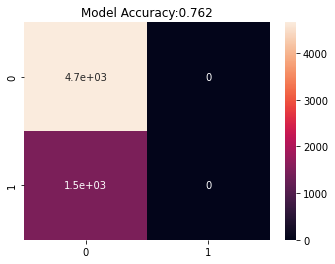

In [549]:
confusion(logreg)

In [550]:
def precision_recall(model):
    from sklearn.metrics import precision_recall_curve
    
    proba = model.predict_proba(x_test)
    
    precision, recall, threshold = precision_recall_curve(y_test, proba[:,1])
    
    plt.plot(precision, recall)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')

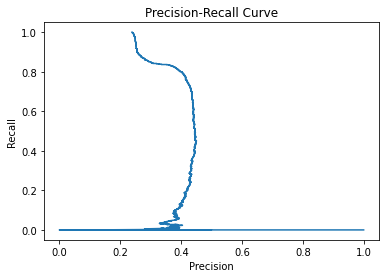

In [551]:
precision_recall(logreg)

In [552]:
def roc_curve(model):
    from sklearn.metrics import roc_curve, auc
    
    #scores = model.decision_function(X_test)
    proba = model.predict_proba(x_test)
    
    fpr, tpr, _ = roc_curve(y_test, proba[:,1])
    
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve. AUC: {}'.format(auc(fpr, tpr)))

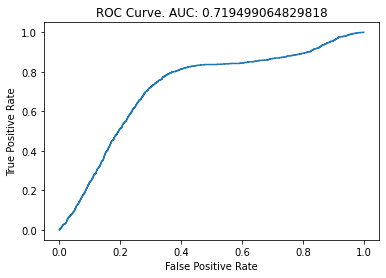

In [553]:
roc_curve(logreg)

In [554]:
from sklearn.metrics import precision_score

y_pred = logreg.predict(x_test)

micro_avg = precision_score(y_test, y_pred, average='micro')
macro_avg = precision_score(y_test, y_pred, average='macro')

print('Micro Average Precision Score: {:.2f}'.format(
    precision_score(y_test, y_pred, average='micro')))
print('Macro Average Precision Score: {:.2f}'.format(
    precision_score(y_test, y_pred, average='macro')))


Micro Average Precision Score: 0.76
Macro Average Precision Score: 0.38


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [556]:
print('Number of instances in the > $50,000 class: {}'.format(
    len(data[data.salary ==1])))
print('Number of instances in the < $50,000 class: {}'.format(
    len(data[data.salary ==0])))

Number of instances in the > $50,000 class: 7185
Number of instances in the < $50,000 class: 23379


In [558]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    
    grid_values = {'max_depth':np.arange(1,10), 'min_samples_leaf': np.arange(1,50,10)}
    clf = DecisionTreeClassifier()
    
    grid_dec_tree = GridSearchCV(clf, param_grid = grid_values)
    grid_dec_tree.fit(x, y)
    
    return grid_dec_tree.best_estimator_

In [559]:
clf_dec_tree = decision_tree()

In [560]:
 evaluation(clf_dec_tree)

              precision    recall  f1-score   support

   Under 50k       0.76      1.00      0.86      4656
    Over 50k       0.00      0.00      0.00      1457

    accuracy                           0.76      6113
   macro avg       0.38      0.50      0.43      6113
weighted avg       0.58      0.76      0.66      6113

Training Set Accuracy Score: 0.77
Testing Set Accuracy Score: 0.76


C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

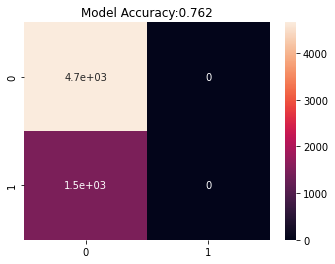

In [561]:
confusion(clf_dec_tree)

In [562]:
def random_forest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    clf = RandomForestClassifier(random_state=0)
    grid_values = {'max_depth': np.arange(1,11,2), 'max_features': np.arange(1,11,2)}
    
    grid_clf = GridSearchCV(clf, param_grid = grid_values)
    grid_clf.fit(x, y)
    
    
    return grid_clf.best_estimator_

In [563]:
rdm_forest_clf = random_forest()

In [564]:
evaluation(rdm_forest_clf)

              precision    recall  f1-score   support

   Under 50k       0.76      1.00      0.86      4656
    Over 50k       1.00      0.00      0.00      1457

    accuracy                           0.76      6113
   macro avg       0.88      0.50      0.43      6113
weighted avg       0.82      0.76      0.66      6113

Training Set Accuracy Score: 0.77
Testing Set Accuracy Score: 0.76


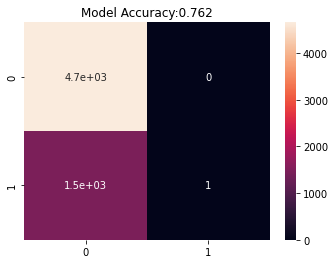

In [565]:
confusion(rdm_forest_clf)

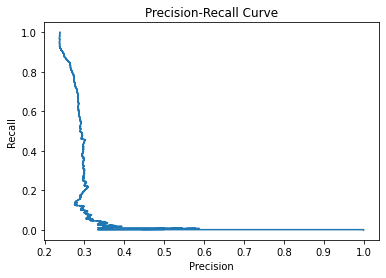

In [566]:
precision_recall(rdm_forest_clf)

In [94]:
def gbdc():
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV
    
    grid_values = {'learning_rate': np.arange(0.01, 1.1, 0.25), 'max_depth': np.arange(2,6,1)}
    
    clf = GradientBoostingClassifier()
    
    grid_gbdc = GridSearchCV(clf, param_grid = grid_values)
    grid_gbdc.fit(x_train, y_train)
    
    grid_gbdc.best_estimator_.score(x_train, y_train)
    
    print('Best Parameters: {}'.format(grid_gbdc.best_params_))
    print('Train Score: {:.2f}'.format(grid_gbdc.best_estimator_.score(x_train, y_train)))
    print('Test Score: {:.2f}'.format(grid_gbdc.best_estimator_.score(x_test, y_test)))
    
gbdc()

Best Parameters: {'learning_rate': 0.26, 'max_depth': 2}
Train Score: 0.84
Test Score: 0.83


In [96]:
gd=gbdc()
precision_recall(gd)